In [1]:
# load dataset
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

data = load_file('train/Inertial Signals/total_acc_y_train.txt')
print(data.shape)

(7352, 128)


In [2]:
# load dataset
from numpy import dstack
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load the total acc data
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='train/Inertial Signals/')
print(total_acc.shape)

(7352, 128, 3)


In [3]:
# load a dataset group, such as train or test
def load_dataset(group):
 filepath = group + '/Inertial Signals/'
 # load all 9 files as a single array
 filenames = list()
 # total acceleration
 filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
 # body acceleration
 filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
 # body gyroscope
 filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
 # load input data
 X = load_group(filenames, filepath)
 # load class output
 y = load_file(group + '/y_'+group+'.txt')
 return X, y
 
# load all train
trainX, trainy = load_dataset('train')
print(trainX.shape, trainy.shape)
# load all test
testX, testy = load_dataset('test')
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


In [4]:
# summarize class balance
from numpy import array
from numpy import vstack
from pandas import read_csv
from pandas import DataFrame

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# summarize the balance of classes in an output variable column
def class_breakdown(data):
	# convert the numpy array into a dataframe
	df = DataFrame(data)
	# group data by the class value and calculate the number of rows
	counts = df.groupby(0).size()
	# retrieve raw rows
	counts = counts.values
	# summarize
	for i in range(len(counts)):
		percent = counts[i] / len(df) * 100
		print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

# load train file
trainy = load_file('train/y_train.txt')
# summarize class breakdown
print('Train Dataset')
class_breakdown(trainy)

# load test file
testy = load_file('test/y_test.txt')
# summarize class breakdown
print('Test Dataset')
class_breakdown(testy)

# summarize combined class breakdown
print('Both')
combined = vstack((trainy, testy))
class_breakdown(combined)

Train Dataset
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138
Test Dataset
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222
Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


In [5]:
# load data
trainX, trainy = load_dataset('train')

In [6]:
# Load the necessary libraries
from numpy import unique

# Load data
sub_map = load_file('train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]


In [7]:
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]


In [8]:
# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

In [9]:
# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left')
	pyplot.show()

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(409, 128, 9) (409, 1)


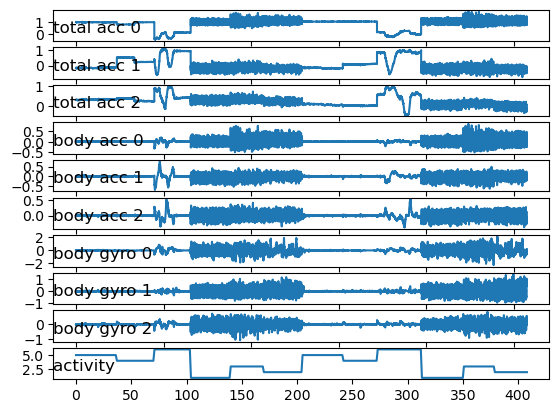

In [10]:
# plot all vars for one subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group):
	filepath = group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left')
	pyplot.show()

# load data
trainX, trainy = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
sub_id = train_subjects[15]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)

C:\Users\Amina\AppData\Local\Temp\ipykernel_17016\524147707.py:70: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)


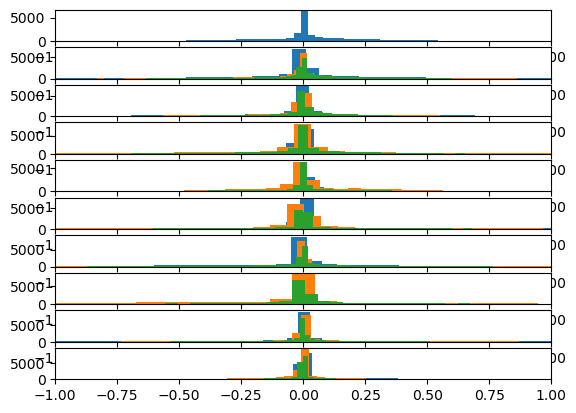

In [27]:
# plot histograms for multiple subjects
from numpy import array
from numpy import unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group):
	filepath = group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# plot histograms for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
	pyplot.figure()
	# get unique subjects
	subject_ids = unique(sub_map[:,0])
	# enumerate subjects
	xaxis = None
	for k in range(n):
		sub_id = subject_ids[k]
		# get data for one subject
		subX, _ = data_for_subject(X, y, sub_map, sub_id)
		# body acc
		for i in range(3):
			ax = pyplot.subplot(n, 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(subX[:,:,6+i]), bins=100)
	pyplot.show()
    
# load training dataset
X, y = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
# plot histograms for subjects
plot_subject_histograms(X, y, sub_map)

C:\Users\Amina\AppData\Local\Temp\ipykernel_4272\2386573226.py:75: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)


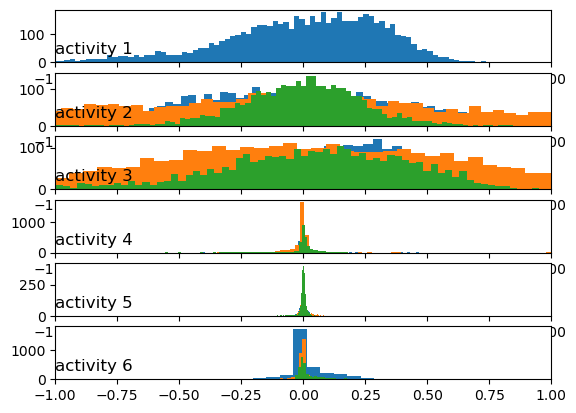

In [11]:
# plot histograms per activity for a subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group):
	filepath = group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# group data by activity
def data_by_activity(X, y, activities):
	# group windows by activity
	return {a:X[y[:,0]==a, :, :] for a in activities}

# plot histograms for each activity for a subject
def plot_activity_histograms(X, y):
	# get a list of unique activities for the subject
	activity_ids = unique(y[:,0])
	# group windows by activity
	grouped = data_by_activity(X, y, activity_ids)
	# plot per activity, histograms for each axis
	pyplot.figure()
	xaxis = None
	for k in range(len(activity_ids)):
		act_id = activity_ids[k]
		# total acceleration
		for i in range(3):
			ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
			ax.set_xlim(-1,1)
			if k == 0:
				xaxis = ax
			pyplot.hist(to_series(grouped[act_id][:,:,6+i]), bins=100)
			pyplot.title('activity '+str(act_id), y=0, loc='left')
	pyplot.show()

# load data
trainX, trainy = load_dataset('train')
# load mapping of rows to subjects
sub_map = load_file('train/subject_train.txt')
train_subjects = unique(sub_map)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
# plot data for subject
plot_activity_histograms(subX, suby)

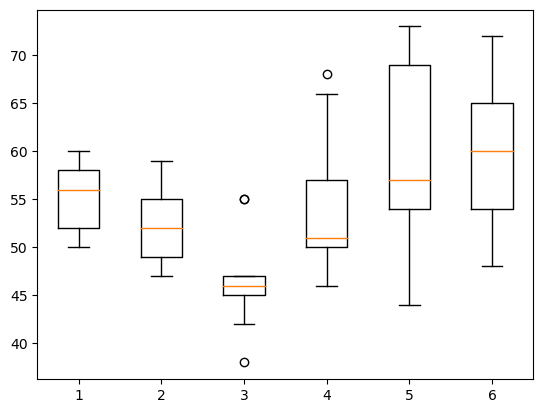

In [34]:
# plot durations of each activity by subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group):
	filepath = group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

# group data by activity
def data_by_activity(X, y, activities):
	# group windows by activity
	return {a:X[y[:,0]==a, :, :] for a in activities}

# plot activity durations by subject
def plot_activity_durations_by_subject(X, y, sub_map):
	# get unique subjects and activities
	subject_ids = unique(sub_map[:,0])
	activity_ids = unique(y[:,0])
	# enumerate subjects
	activity_windows = {a:list() for a in activity_ids}
	for sub_id in subject_ids:
		# get data for one subject
		_, subj_y = data_for_subject(X, y, sub_map, sub_id)
		# count windows by activity
		for a in activity_ids:
			activity_windows[a].append(len(subj_y[subj_y[:,0]==a]))
	# organize durations into a list of lists
	durations = [activity_windows[a] for a in activity_ids]
	pyplot.boxplot(durations, labels=activity_ids)
	pyplot.show()

# load test dataset
X, y = load_dataset('test')
# load mapping of rows to subjects
sub_map = load_file('test/subject_test.txt')
# plot durations
plot_activity_durations_by_subject(X, y, sub_map)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# Load the data into a NumPy array
data = np.loadtxt('train/Inertial Signals/total_acc_y_train.txt')

# Convert the NumPy array to a DataFrame
train_df = pd.DataFrame(data)

# Check for null values
print('Null values:', train_df.isnull().values.sum())

# Print the data types of the DataFrame columns
print(train_df.dtypes)

print('Number of duplicates in train set:{}'.format(sum(train_df.duplicated())))
print(train_df.columns)

#print(train_df.columns)
#last_column = train_df.iloc[:, -1]
#px.pie(train_df, names=last_column, title='Activity in database')

Null values: 0
0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
123    float64
124    float64
125    float64
126    float64
127    float64
Length: 128, dtype: object
Number of duplicates in train set:0
RangeIndex(start=0, stop=128, step=1)


In [58]:
from sklearn import preprocessing
X=train_df.drop(train_df.columns[20],axis=1)
Y=train_df[train_df.columns[20]]
print('X matrix size:',X.shape)
X=preprocessing.StandardScaler().fit(X).transform(X)
#test
test_df=pd.read_csv('test/Inertial Signals/total_acc_y_test.txt')
# Convert the NumPy array to a DataFrame
test_df = pd.DataFrame(data)
X_test=test_df.drop(test_df.columns[0],axis=1)
X_t=preprocessing.StandardScaler().fit(X_test).transform(X_test)

X matrix size: (7352, 127)


Text(0, 0.5, 'explained variance')

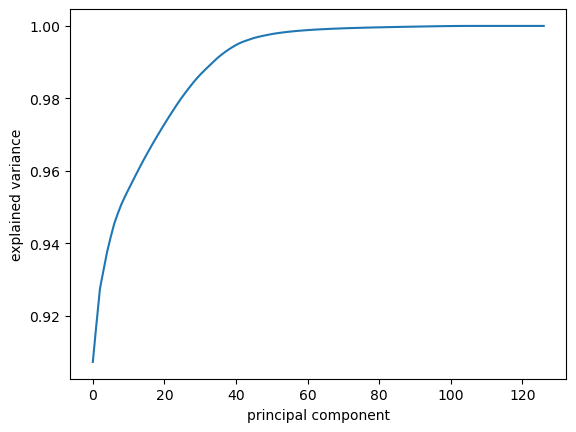

In [60]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA(n_components=127).fit(X)   # number of components
principal_component=pca.transform(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal component')
plt.ylabel('explained variance')

In [61]:
principal_component=PCA(n_components=127).fit_transform(X)
X_test_pca=pca.transform(X_t)
pca_df=pd.DataFrame(data=principal_component)
pca_test_d=pd.DataFrame(data=X_test_pca)
pca_df.head()
pca_df.shape

(7352, 127)

In [63]:
#logistic regression
X_train=train_df.drop(train_df.columns[20],axis=1)
Y_train=train_df[train_df.columns[20]]
X_test=test_df.drop(train_df.columns[20],axis=1)
Y_test=test_df[train_df.columns[20]]

In [67]:
print(type(Y_train))

<class 'pandas.core.series.Series'>


In [68]:
num_bins = 5  # Define the number of bins/categories
Y_train_bins = pd.cut(Y_train, bins=num_bins, labels=False)

# Verify the converted labels
print(Y_train_bins.unique())

[2 1 3 4 0]


In [70]:
import pandas as pd

num_bins = 5  # Define the number of bins/categories

X_train_bins = pd.DataFrame()  # Create an empty DataFrame to store the binned data

# Iterate over the columns of X_train and apply binning to each column
for column in X_train.columns:
    X_train_bins[column] = pd.cut(X_train[column], bins=num_bins, labels=False)

# Verify the converted labels
for column in X_train_bins.columns:
    print(X_train_bins[column].unique())
    

C:\Users\Amina\AppData\Local\Temp\ipykernel_17016\1504623710.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Amina\AppData\Local\Temp\ipykernel_17016\1504623710.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Amina\AppData\Local\Temp\ipykernel_17016\1504623710.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

[2 1 3 4 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 1 3 4 0]
[1 2 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 1 3 4 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 3 4 1 0]
[2 1 3 4 0]
[2 1

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load a dataset group, such as train or test
def load_dataset(group):
 filepath = group + '/Inertial Signals/'
 # load all 9 files as a single array
 filenames = list()
 # total acceleration
 filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
 # body acceleration
 filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
 # body gyroscope
 filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
 # load input data
 X = load_group(filenames, filepath)
 # load class output
 y = load_file(group + '/y_'+group+'.txt')
 return X, y
 
# load all train
trainX, trainy = load_dataset('train')

# load all test
testX, testy = load_dataset('test')



# Reshape trainX to 2-dimensional array
num_samples, num_timesteps, num_features = trainX.shape
trainX_reshaped = trainX.reshape((num_samples, num_timesteps * num_features))

# Reshape trainy to 1-dimensional array
trainy_reshaped = trainy.ravel()

# Create an instance of the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the reshaped training data
rf_clf.fit(trainX_reshaped, trainy_reshaped)



# Reshape testX to 2-dimensional array
num_samples_test, num_timesteps_test, num_features_test = testX.shape
testX_reshaped = testX.reshape((num_samples_test, num_timesteps_test * num_features_test))

# Reshape testy to 1-dimensional array
testy_reshaped = testy.ravel()

# Make predictions on the reshaped test data
predictions = rf_clf.predict(testX_reshaped)

accuracy = accuracy_score(testy, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.846284356973193


In [13]:
from sklearn.metrics import confusion_matrix

# Make predictions on the reshaped test data
predictions = rf_clf.predict(testX_reshaped)

# Create a confusion matrix
cm = confusion_matrix(testy_reshaped, predictions)
print(cm)

[[443  21  32   0   0   0]
 [ 83 360  28   0   0   0]
 [ 27  28 365   0   0   0]
 [  3  20   0 385  83   0]
 [  2   4   0 122 404   0]
 [  0   0   0   0   0 537]]


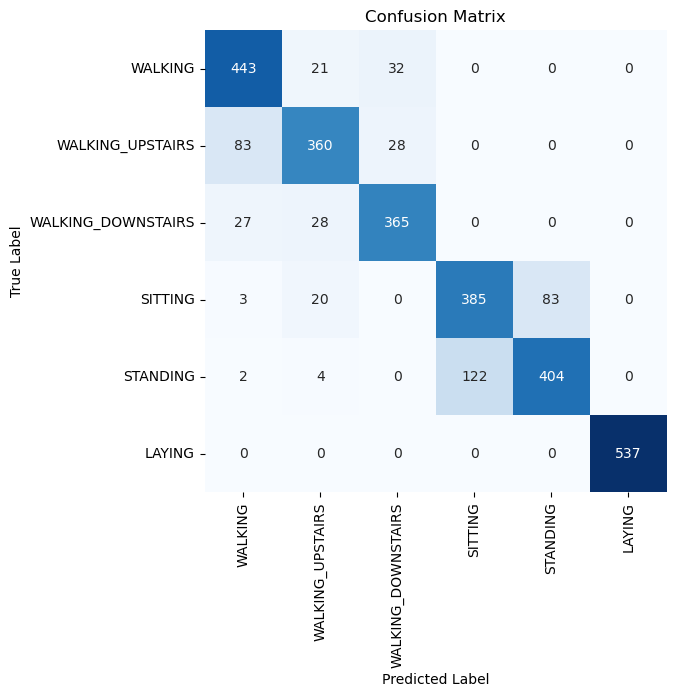

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix

cm = confusion_matrix(testy_reshaped, predictions)
# Define the class labels
class_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()


In [16]:
import numpy as np

# Reshape trainX to 2-dimensional array
num_samples, num_timesteps, num_features = trainX.shape
trainX_reshaped = trainX.reshape((num_samples, num_timesteps * num_features))

# Create an instance of the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# Fit the classifier to the reshaped training data
dt_clf.fit(trainX_reshaped, trainy)

# Make predictions on the test data
testX_reshaped = testX.reshape((testX.shape[0], num_timesteps * num_features))
y_pred = dt_clf.predict(testX_reshaped)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(testy, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7217509331523583


In [17]:
from sklearn.metrics import confusion_matrix

# Reshape trainX and testX to 2-dimensional arrays
num_samples, num_timesteps, num_features = trainX.shape
trainX_reshaped = trainX.reshape((num_samples, num_timesteps * num_features))
testX_reshaped = testX.reshape((testX.shape[0], num_timesteps * num_features))

# Fit the Decision Tree Classifier to the reshaped training data
dt_clf = DecisionTreeClassifier()
dt_clf.fit(trainX_reshaped, trainy)

# Make predictions on the test data
y_pred = dt_clf.predict(testX_reshaped)

# Create the confusion matrix
cm = confusion_matrix(testy, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[301  69  99  12  15   0]
 [102 282  73  10   4   0]
 [ 79  67 253   7  14   0]
 [ 11   3   1 354 122   0]
 [ 10   7   1  97 417   0]
 [  0   0   0   0   0 537]]


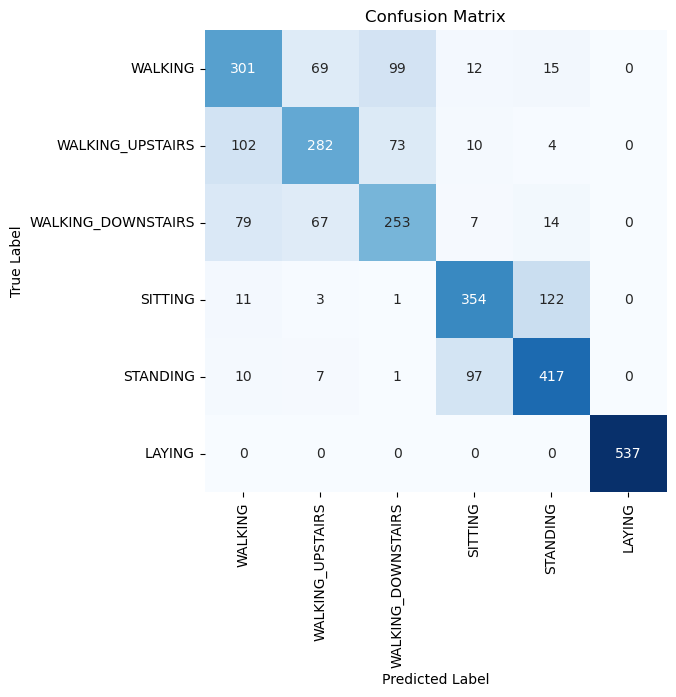

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(testy, y_pred)

# Define the class labels
class_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()
